<a href="https://colab.research.google.com/github/mariachurches/PythonIA/blob/main/WhitePapers/01MIAR_ACT_WhitePapers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/mariachurches/PythonIA/blob/main/img/viu_logo.png?raw=1" width="200">

## 01MIAR - Actividad Whitepapers - María Iglesias Veiga




**Librerias necesarias para el desarrollo de las actividades**

In [7]:
import os
import sys
import mmap
import random
import numpy as np
from time import time
import matplotlib.pyplot as plt

## Artículo 01

### The NumPy array: a structure for efficient numerical computation

Van Der Walt, S., Colbert, S. C., &amp; Varoquaux, G. (2011). The NumPy array: A
structure for efficient numerical computation. Computing in Science and
Engineering, 13(2), 22-30. https://doi.org/10.1109/MCSE.2011.37

https://www.researchgate.net/publication/224223550_The_NumPy_Array_A_Structure_for_Efficient_Numerical_Computation

En este artículo se presenta la estructura *ndarray* de NumPy, y se hace un estudio sobre su uso y cómo mejora el rendimiento de ciertas operaciones matemáticas para la computación numérica.

Se hace una breve introducción al *Broadcasting* como técnica que usa NumPy para realizar operaciones artiméticas sobre dos o más arrays con distintas dimensiones. 

- Actividad 01.01 - Ampliar dicha explicación, aportando posibles restricciones o limitaciones a dicho sistema y ejemplos propios de los casos de uso.

También se introduce el trabajo con ficheros usando memoria mapeada.

- Actividad 01.02 - Verificar la eficacia y mejora posible de rendimiento del uso de dicha técnica sobre ndarrays de tamaños grandes.

# **Artículo 01 - The NumPy array: a structure for efficient numerical computation**



## **Actividad 01.01 - Ampliar dicha explicación, aportando posibles restricciones o limitaciones a dicho sistema y ejemplos propios de los casos de uso.**

###01.01.1 ¿Qué significa el término broadcasting?

El término Broadcasting hace referencia a la estrategia que usa numpy para hacer operaciones entre arrays de diferentes tamaños. El array de menor tamaño se propaga a traves del array de mayor tamaño, haciendo las dimensiones compatibles.

###01.01.2 ¿Qué ventajas proporciona?

Esta estrategia consigue evitar las copias innecesarias de datos en memoria. Esta ventaja se puede ver fácilmente en un ejemplo muy sencillo:

In [8]:
# Ejemplo 1 - Sin usar Broadcasting.
array_a = np.array([1,2,3,4,5])
array_b = np.array([5,5,5,5,5])
print(f"Dimensiones del array_a {array_a.shape} , dimensiones del array_b {array_b.shape}")
print(f"Tamaño que ocupan en memoria ambas variables {sys.getsizeof(array_a) + sys.getsizeof(array_b)}")
array_a * array_b

Dimensiones del array_a (5,) , dimensiones del array_b (5,)
Tamaño que ocupan en memoria ambas variables 288


array([ 5, 10, 15, 20, 25])

In [9]:
# Ejemplo 2 - Usando Broadcasting
array_a = np.array([1,2,3,4,5])
array_b = 5

print(f"Dimensiones del array_a {array_a.shape}")
print(f"Tamaño que ocupan en memoria ambas variables {sys.getsizeof(array_a) + sys.getsizeof(array_b)}")
array_a * array_b

Dimensiones del array_a (5,)
Tamaño que ocupan en memoria ambas variables 172


array([ 5, 10, 15, 20, 25])

En los ejemplos 1 y 2 podemos ver dos estrategias diferentes de multiplicación de numpy arrays, en el primer ejemplo vemos como al no usar la técnica de broadcasting almacenamos en memoria dos arrays de 5 elementos, en cambio en el ejemplo 2 beneficiandonos del uso de broadcasting podemos realizar la misma operación únicamente almacenando un array y un entero ya que está estrategia se encarga de propagar la variable de menor dimensión (en este caso array_b que es un entero) sobre la variable de mayor dimension.

 lo que consigue hacer algoritmos más eficientes.

###01.01.3 ¿Qué limitaciones presenta?

Aun con todas sus ventajas, existen restricciones en esta estrategia, ya que en ciertos casos el Broadcasting es una mala idea ya que conduce a un uso ineficiente de la memoria ralentizando el cálculo.

Ejemplos de broadcasting:

Después del broadcasting la matriz resultante tendrá la dimensión mayor de cada uno de los elementos.

In [10]:
#Caso 1
a = np.arange(10).reshape(2,5)
b = np.ones((5))
c = a+b
print(c)
print("\nShape a" , a.shape)
print("Shape b" , b.shape)
print("Shape c" , c.shape)

[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]]

Shape a (2, 5)
Shape b (5,)
Shape c (2, 5)


In [11]:
#Caso 2
a = np.arange(10).reshape(10,1)
b = np.ones((5)).reshape(1,5)
c = a+b
print(c)

print("\nShape a" , a.shape)
print("Shape b" , b.shape)
print("Shape c" , c.shape)

[[ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.]
 [ 6.  6.  6.  6.  6.]
 [ 7.  7.  7.  7.  7.]
 [ 8.  8.  8.  8.  8.]
 [ 9.  9.  9.  9.  9.]
 [10. 10. 10. 10. 10.]]

Shape a (10, 1)
Shape b (1, 5)
Shape c (10, 5)


Restricciones y limitaciones de broadcasting:

Las matrices se pueden transmitir juntas si son compatibles con todas las dimensiones.

In [12]:
#Limitación de caso 1
a = np.arange(10).reshape(2,5)
b = np.ones((6))
print(a+b)

ValueError: ignored

In [ ]:
#Limitación de caso 2
a = np.arange(10).reshape(10,1)
b = np.ones((5)).reshape(5,1)
print(a+b)

##**Actividad 01.02 - Verificar la eficacia y mejora posible de rendimiento del uso de dicha técnica sobre ndarrays de tamaños grandes.**

## Artículo 01

### The NumPy array: a structure for efficient numerical computation

Van Der Walt, S., Colbert, S. C., &amp; Varoquaux, G. (2011). The NumPy array: A
structure for efficient numerical computation. Computing in Science and
Engineering, 13(2), 22-30. https://doi.org/10.1109/MCSE.2011.37

https://www.researchgate.net/publication/224223550_The_NumPy_Array_A_Structure_for_Efficient_Numerical_Computation

En este artículo se presenta la estructura *ndarray* de NumPy, y se hace un estudio sobre su uso y cómo mejora el rendimiento de ciertas operaciones matemáticas para la computación numérica.

Se hace una breve introducción al *Broadcasting* como técnica que usa NumPy para realizar operaciones artiméticas sobre dos o más arrays con distintas dimensiones. 

- Actividad 01.01 - Ampliar dicha explicación, aportando posibles restricciones o limitaciones a dicho sistema y ejemplos propios de los casos de uso.

También se introduce el trabajo con ficheros usando memoria mapeada.

- Actividad 01.02 - Verificar la eficacia y mejora posible de rendimiento del uso de dicha técnica sobre ndarrays de tamaños grandes.

El mapeo de memoria (*memory mapping*) es una técnica que tiene su mayor fortaleza en acciones de E/S de ficheros, esta técnica consigue cargar los datos directamente en memoria virtual consiguiendo el acceso directo a posiciones especificas sin falta de cargar todos los datos. 

que se ayuda de la memoría virtual de la máquina para evitar cargar directamente los datos que se leen en memoria para luego volver a guardarlo en disco. Con esta técnica al realizar el mapeo podemos trabajar directamente en memoria y acceder a posiciones de los datos de forma directa sin falta de cargar todos.

A continuación, mostraremos un ejemplo del rendimiento en lectura de ficheros usando dos estrategias, una de lectura y busqueda estandar de un fichero y otra usando la técnica de mapeo de memoria.

*Nota: Este ejemplo se hace con un total de 16 repeticiones para que en el gráfico resultante se aprecien las diferencias, aun así, se ha dejado la variable repes por si se quiere bajar o aumentar el número de iteraciones de este. (tiempo estimado de ejecución: 1min 14segs)*

In [13]:
random.seed(0)
def crear_fichero(t):
  file = open("/content/file.txt", "w")
  for i in range(t+1):
    file.write("C++")
    if i == int(random.random()*t) : file.write("Python") 
  file.close()

Tamaño del fichero : 3
Tiempo de lectura sin mapeo de memoria : 9.417533874511719e-05
Tiempo de lectura con mapeo de memoria : 9.012222290039062e-05
Tamaño del fichero : 11
Tiempo de lectura sin mapeo de memoria : 0.00010752677917480469
Tiempo de lectura con mapeo de memoria : 7.271766662597656e-05
Tamaño del fichero : 21
Tiempo de lectura sin mapeo de memoria : 0.0001125335693359375
Tiempo de lectura con mapeo de memoria : 0.0002307891845703125
Tamaño del fichero : 101
Tiempo de lectura sin mapeo de memoria : 0.00015115737915039062
Tiempo de lectura con mapeo de memoria : 0.00010752677917480469
Tamaño del fichero : 201
Tiempo de lectura sin mapeo de memoria : 8.559226989746094e-05
Tiempo de lectura con mapeo de memoria : 8.082389831542969e-05
Tamaño del fichero : 1001
Tiempo de lectura sin mapeo de memoria : 8.320808410644531e-05
Tiempo de lectura con mapeo de memoria : 5.555152893066406e-05


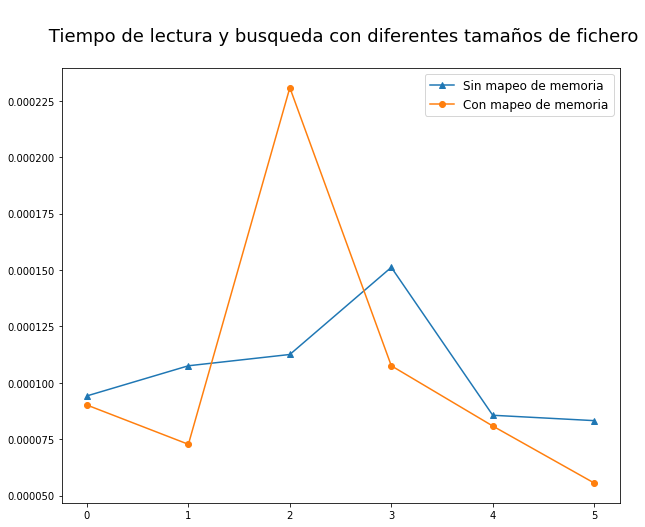

El mapeo de memoria ha tardado menos tiempo de ejecución 5 de las 6 repeticiones


In [32]:
#Creación de estructuras de clases necesarias
repes = 16
tamaño = 1
sin_mapeo = []
con_mapeo = []

#Prueba de lectura de datos con y sin mapeo
for i in range(repes):
  if i % 2 == 0: tamaño*=2 
  else: tamaño*=5
  crear_fichero(tamaño)
  
  #Ejemplo con lectura normal de fichero
  t_no_mmap_start_read = time() 
  with open("/content/file.txt", mode="r") as fbn:
    texto = fbn.read()
    texto.find("Python")
  t_no_mmap_start_end = time() 

  #Ejemplo usando memory mapping
  t_mmap_start_read = time() 
  with open("/content/file.txt", mode="r") as fbm:
    with mmap.mmap(fbm.fileno(), 0, access= mmap.ACCESS_READ) as mmap_o:
      mmap_o.find(b"Python")
  t_mmap_end_read = time()
  
  #Comparamos los resultados
  sin_mapeo.append(t_no_mmap_start_end - t_no_mmap_start_read)
  con_mapeo.append(t_mmap_end_read - t_mmap_start_read)
  print('Tamaño del fichero : {0}'.format(tamaño+1))
  print('Tiempo de lectura sin mapeo de memoria : {0}'.format(sin_mapeo[-1]))
  print('Tiempo de lectura con mapeo de memoria : {0}'.format(con_mapeo[-1]))

#Visualizamos los datos
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
axes_x = range(repes)
ax.plot(axes_x, sin_mapeo, marker = '^', label='Sin mapeo de memoria')
ax.plot(axes_x, con_mapeo, marker = 'o', label='Con mapeo de memoria')
plt.title("\n Tiempo de lectura y busqueda con diferentes tamaños de fichero\n", loc="center", fontsize=18)
plt.legend(loc="best", prop={'size': 12})
plt.show()

results = list(map(lambda x, y: x > y, sin_mapeo, con_mapeo))
if all(results) : print("La ejecución sin mapeo de memoria ha ocasionado una disminución de lectura para todos los tamaños de fichero")
else:
  print(f"El mapeo de memoria ha tardado menos tiempo de ejecución {sum(results)} de las {repes} repeticiones")

Como podemos observar a mayor tamaño de fichero mayor es la diferencia en el  tiempo de ejecución, diferenciandose cada vez más la mejoría usando la técnica de memory mapping. 

## Artículo 02

### Data Structures for Statistical Computing in Python

McKinney, W. (2010). Data Structures for Statistical Computing in Python.
Proceedings of the 9th Python in Science Conference, December, 56-61.
https://doi.org/10.25080/majora-92bf1922-00a

https://www.researchgate.net/publication/265001241_Data_Structures_for_Statistical_Computing_in_Python


Creen que hacia años benideros habrá una gran posibilidad de traer usuarios hacia python desde R.. Matlab.. 
Un grafico estaría guapo
Decir que desde que pandas se introdujo hace ya unos años
Tendencias actuales, uso que hace la gente
R pa que se usa cuales son sus fuertes frente a python
porque python se usa mas que el resto de herramientas
porque sql se usa para cosas determinadas y no otras
Matlab
Julia
Estados actual de herramientas de ciencias de datos en 2021
Empiezo de 0 en ciencia de datos y quiero ver que tecnologias estan disponibles
y quiero una pequeña comparación entre ellas

###**Actividad 02.01 - Desarrollar una opinión razonada del estado actual de las herramientas de análisis de datos estadísticos en contraposición a como se muestran en el artículo, R vs Python vs SQL vs Others...**

#### Introducción

La ciencia de datos es una de las disciplinas con más auge estos útimos años, existen multitud de lenguajes que pueden ser utilizados para este fin, actualmente algunos de los más utilizados son: Python, R, SQL, MATLAB y Julia. Iniciaremos diciendo las mayores ventajas y desventajas de cada uno para poder situarlos.

##### Python

Actualmente el lenguaje de progración más utilizado en el mundo. Su gran popularidad viene en parte gracias a su simplicidad siendo este muy fácil de aprender, además, cuenta de una amplia gama de módulos específicos, con paquetes muy sofisticados para aplicaciones de apredizaje automático así como un gran soporte comunitario gracias a su gran popularidad. 

##### R

Segundo lenguaje de programación más usado de los que vamos a mencionar. Entre sus fuertes tiene su gran poderío en visualización de datos y estadistica. Como Python, gracias a su popularidad R también cuenta con un gran apoyo de una comunidad muy activa y contribuyente.

##### SQL

SQL es un lenguaje más util para el procesamiento de datos que como herramienta analítica avanzada, ya que fue un lenguaje diseñado para administrar, definir y consultar bases de datos relacionales. 

##### MATLAB

 MATLAB es el lenguaje de programación por excelencia en el mundo académico, también es muy utilizado en la industria. Este lenguaje fue diseñado para computación numerica por lo que es adecuado para aplicaciones cuantitativas con requisitos matemáticos sofistacados. Dentro de sus fuertes al igual que R también se en cuentra la visualización de datos. 

##### Julia

Julia es el lenguaje de programación más reciente de los mencionados anteriormente, lo que también hace que no tenga una gran comunidad de apoyo detrás y disponga de paquetes limitados. Aun así, es un lenguaje de programación muy interesante siendo un lenguaje compilado JIT (Just In Time) que le ofrece ventajas que tienen los lenguajes interpretados como Python asi como obtener un gran rendimiento. Este lenguaje fue diseñado especificamente para el análisis numérico, aunque también ofrece la posibilidad de programación de propósitos generales.

##### Conclusión
